
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2023**

---

# Trabajo práctico entregable - Parte 2

In [2]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [3]:
url = 'https://raw.githubusercontent.com/DiploDatos/AnalisisyVisualizacion/master/sysarmy_survey_2022_processed.csv'
df = pd.read_csv(url)

In [4]:
df[:3]

,work_country,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,numero,salary_in_usd,salary_last_dollar_value,salary_pay_cripto,...,profile_studies_level_state,profile_career,profile_university,profile_boot_camp,profile_boot_camp_carrer,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,profile_age,profile_gender
0,Argentina,Catamarca,Full-Time,Staff (planta permanente),300000.0,245000.0,True,NaN,NaN,NaN,...,Completo,Licenciatura en redes y comunicación de datos,UP - Universidad de Palermo,NaN,NaN,NaN,NaN,NaN,35,Varón Cis
1,Argentina,Chaco,Full-Time,Remoto (empresa de otro país),900000.0,850000.0,True,Cobro todo el salario en dólares,300,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,Varón Cis
2,Argentina,Chaco,Full-Time,Staff (planta permanente),120000.0,115000.0,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,Varón Cis


In [5]:
df.profile_gender.unique()

array(['Varón Cis', 'Varón cis', 'Mujer Cis', 'Mujer', 'Varón Trans',
       'Queer', 'No binarie', 'Mujer cis', 'Mujer Trans', 'mujer', 'Gay',
       'Fluido', 'Bigénero', 'Femenino'], dtype=object)

In [6]:
df.loc[:,'profile_g'] = df.profile_gender.replace({'Varón Cis': 'Varón cis','Mujer': 'Mujer cis','Mujer Cis': 'Mujer cis','Femenino': 'Mujer cis','mujer': 'Mujer cis','Mujer':'Mujer cis','Queer':'Diversidades','Varón Trans':'Diversidades','No binarie':'Diversidades','Mujer Trans':'Diversidades','Fluido':'Diversidades','Bigénero':'Diversidades','Gay':'Diversidades'}).fillna(False)

In [7]:
df.profile_g.unique()

array(['Varón cis', 'Mujer cis', 'Diversidades'], dtype=object)

In [8]:
df[['profile_g', 'salary_monthly_NETO']].groupby('profile_g').describe()

salary_monthly_NETO                                               \
                           count           mean            std  min       25%   
profile_g                                                                       
Diversidades                98.0  261873.543041  356719.368150  0.0   90500.0   
Mujer cis                  929.0  188903.430667  184912.713803  0.0   91000.0   
Varón cis                 4331.0  296252.343889  433193.328154  0.0  125000.0   

                                              
                   50%       75%         max  
profile_g                                     
Diversidades  174448.5  262250.0   1950000.0  
Mujer cis     160000.0  237003.0   1878500.0  
Varón cis     212146.0  307988.0  15000000.0

In [9]:
df[df.salary_monthly_NETO > 1000]\
  [['profile_g', 'salary_monthly_NETO']].groupby('profile_g').describe()

salary_monthly_NETO                                        \
                           count           mean            std     min   
profile_g                                                                
Diversidades                85.0  301914.321765  367031.242344  2800.0   
Mujer cis                  806.0  217708.858077  182050.554847  1400.0   
Varón cis                 3975.0  322777.029197  442612.347688  1100.0   

                                                         
                   25%       50%        75%         max  
profile_g                                                
Diversidades  125000.0  190000.0  280000.00   1950000.0  
Mujer cis     116000.0  180000.0  248193.75   1878500.0  
Varón cis     147106.5  225000.0  322827.50  15000000.0

In [10]:
alpha = 0.05

In [47]:
is_man = df.profile_g == 'Varón cis'

groupA = df[(df.salary_monthly_NETO > 1000) & is_man].salary_monthly_NETO
groupB = df[(df.salary_monthly_NETO > 1000) & ~is_man].salary_monthly_NETO

## Ejercicio 1: Estimación

**Consigna:**  Calcular una estimación puntual y un intervalo de confianza de nivel (1-alpha) para la resta entre la media del salario Neto para Hombres menos la media del salario Neto para otros géneros(diferencia de las medias entre el grupoA y grupoB). 
¿Cómo se relaciona este intervalo de confianza con el test de hipótesis?

Para llevar adelante la estimación puntual recurrimos a un estadístico, como es la media muestral ($\bar{X}$), ya que estamos trabajando con una muestra. Esto lo hacemos para estimar el parámetro $\mu_i$, donde $i=A,B$. El grupo A es el de los hombres, y el B el de los que no son hombres.

Al hacer la estimacion puntual obtenemos $\bar{X}$ tanto del grupo A como del B. Luego sigue hacer la diferencia entre las medias. Al hacer esto vemos que **los hombres ganan más** en promedio que aquellos que no son hombres. Específicamente, en promedio los hombres ganan $97.035 más. Esto es simplemente una estimación que surge de la muestra, y no estamos considerando el error de estimación que puede haber.

In [12]:
mean_dif = groupA.mean() - groupB.mean()
mean_dif

97035.10219411727

Ahora queremos incluir un intervalo de confianza. Como el nivel de significación es del 5\%, estamos buscando un intervalos de valores que incluya al verdadero valor del parámetro (la diferencia de medias, $\mu_A - \mu_B$) con un 95% de confianza. Al tratarse de una diferencia de medias, nuestra primera aproximación es usar el pivote asociado al test t-Student convencional, pero el mismo es válido sólo cuando las varianzas y los tamaños de muestra ($n$) son iguales, por lo que primero chequeamos eso:

In [13]:
import scipy

n_A = len(groupA)
n_B = len(groupB)
mean_A = groupA.mean()
mean_B = groupB.mean()
std_A = groupA.std()
std_B = groupB.std()

from tabulate import tabulate
datos = [['Grupo A', mean_A, std_A**2, n_A], ['Grupo B', mean_B, std_B**2, n_B]]
print (tabulate(datos, headers=["Muestra", "Media", "Varianza", "n"]))



Muestra      Media     Varianza     n
---------  -------  -----------  ----
Grupo A     322777  1.95906e+11  3975
Grupo B     225742  4.33041e+10   891


Como se puede observar, las varianzas son muy distintas (al igual que los tamaños de las muestras). Por ende tenemos dos alternativas. Una es obtener dos muestras aleatorias de los datos que tengan el mismo tamaño y la misma varianza, para poder aplicar el pivote t de Student clásico para diferenica de medias. Pero esto implicaría forzar demasiado los datos, aunque hacemos el intento. Como se ve a continuación, las varianzas siguen siendo muy diferentes entre sí, por lo que sigue sin poder emplearse el pivote t de Student tradicional.

In [14]:
muestra_A = groupA.sample(500, replace=False)
muestra_B = groupB.sample(500, replace=False)

n_muestra_A = len(muestra_A)
n_muestra_B = len(muestra_B)
mean_muestra_A = muestra_A.mean()
mean_muestra_B = muestra_B.mean()
std_muestra_A = muestra_A.std()
std_muestra_B = muestra_B.std()

from tabulate import tabulate
datos = [['Muestra Grupo A', mean_muestra_A, std_muestra_A**2, n_muestra_A], ['Muestra Grupo B', mean_muestra_B, std_muestra_B**2, n_muestra_B]]
print (tabulate(datos, headers=["Muestra", "Media", "Varianza", "n"]))


Muestra            Media     Varianza    n
---------------  -------  -----------  ---
Muestra Grupo A   317467  1.05339e+11  500
Muestra Grupo B   222031  4.18392e+10  500


 Cuando las varianzas y los tamaños de las muestras son diferentes lo correcto es utilizar el test de Welch, y de ahí sacamos el pivote a aplicar.

$IC = (\bar{X}_1 - \bar{X}_2) \pm t_{a/2} \sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}$

Donde $t_{a/2}$ es el t crítico de Welch. Para conocerlo debemos obtener primero los grados de libertad, que surgen de la siguiente fórmula (ecuación Welch-Sattertwaite):

$df = \frac{(s_1^2/n_1+s_2^2/n_2)2}{(s_1^2/n_1)^2/(n_1-1)+(s_2^2/n_2)^2/(n_2-1)}$

In [15]:


std2_A = std_A**2
std2_B = std_B**2
d_f_num = std2_A/n_A + std2_B/n_B
d_f_num = d_f_num**2
d_f = d_f_num / ((std2_A/n_A)**2/(n_A-1) + (std2_B/n_B)**2/(n_B-1))
print(d_f)



2934.414828228228


Los grados de libertad son 2934. Viendo la tabla de valores críticos para un 95% de confianza y dos colas se obtiene que para unos grados de libertad tan elevados el t crítico tiende a 1,96. Eso ya nos permite calcular el intervalo de confianza.

In [16]:
from math import sqrt

t_095 = 1.96
low = (mean_A - mean_B) - sqrt(std2_A/n_A + std2_B/n_B)*t_095
upp = (mean_A - mean_B) + sqrt(std2_A/n_A + std2_B/n_B)*t_095

print('Pr(', low, '<','mu_1 - mu_2','<', upp,') = 0,95')


Pr( 77643.36878721412 < mu_1 - mu_2 < 116426.83560102042 ) = 0,95


Esto quiere decir que con 95% de confianza podemos decir que la diferencia salarial entre hombres y los que no se perciben como hombres está entre \$77.643,37 y $116.426,84.

La relación entre el intervalo de confianza y el test de hipótesis es clara. El cálculo de un intervalo de confianza puede basarse en los mismos datos que se utilizan para realizar un test de hipótesis. En el test de hipótesis se contrasta un valor observado con uno (prueba de una cola) o dos (prueba de dos colas) valores críticos. El estadístico usado para obtener el valor observado se puede usar para crear los intervalos de confianza, junto con el valor tabulado de la distribución correspondiente, necesario para calcular el valor crítico en el test de hipótesis. 

## Ejercicio 2: Test de hipótesis



### 2.1 Formalización

Describir formalmente los distintos componentes de un test de hipótesis para comprobar si la distribución de los salarios es distinta entre los grupos A y B.

**Hipótesis Nula ($H_0$) y Alternativa ($H_1$)**

$H_0: \mu_1 - \mu_2 = 0 \\ H_1: \mu_1 - \mu_2 \neq 0$

Lo que se está planteando acá es que la hipótesis nula es que la diferencia entre el salario promedio de los hombres programadores y el de los que no son hombres no es significativa, mientras que la hipótesis alternativa es que sí hay una diferencia estadísticamente significativa entre ambos salarios promedios.

**Estadístico (Pivote)**
  * Identificar el estadístico

El estadístico a utilizar es el del test t de Welch:

$t = \frac{\bar{X}_1-\bar{X}_2}{\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}}$

  * Escribir qué distribución tiene bajo $H_0$

Bajo hipótesis nula el estadístico de Welch tiene distribución $t$ con grados de libertad dados por la siguiente fórmula (ecuación Welch-Sattertwaite):

$df = \frac{(s_1^2/n_1+s_2^2/n_2)2}{(s_1^2/n_1)^2/(n_1-1)+(s_2^2/n_2)^2/(n_2-1)}$


### 2.2 P-valor

1. Calcule el p-valor y decida si rechazar o no la hipótesis nula.
2. Interprete el resultado.

Links útiles:
* [Test de hipótesis usando scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
* [Test de Welch](http://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html)

In [17]:
welch_t = (mean_A - mean_B)/(((std_A**2/n_A)+(std_B**2/n_B))**(1/2))
print(welch_t)

t_test = scipy.stats.ttest_ind(groupA, groupB, equal_var=False)
t_test

9.807725607075726


Ttest_indResult(statistic=9.807725607075726, pvalue=2.2923222141073007e-22)

El p-value es 2,2923e-22, es decir, prácticamente 0. Esto quiere decir que se rechaza fuertemente la hipótesis nula de que la diferencia entre los salarios promedios es nula. Podemos afirmar que la diferencia entre los salarios promedios es muy significativa estadísticamente (a favor de los hombres, por lo que surge de hacer la diferencia en la estimación puntual). También se podría haber comparado el valor observado (9,8) con el valor crítico (1,96). Como 9,8 es mayor a 1,96, se cae en la zona de rechazo, y se rechaza la hipótesis nula.

### [Opcional] 2.3 Potencia del test

Nuestra muestra, ¿era lo suficientemente grande para detectar si existe o no una diferencia entre los grupos?

1. Utilice la función `tt_ind_solve_power` para calcular el tamaño necesario de la muestra para un poder estadístico de 0.8, 0.9 y 0.95, asumiendo una significancia estadística de 0.05.
2. ¿Cómo intepretan el poder estadístico de un test? Dado su conocimiento de dominio sobre los datos, ¿les parece que esta muestra es lo suficientemente grande para ser representativo de la tendencia general? ¿y para utilizarlo en un juicio penal contra una empresa XX por una causa de discriminación?

[Documentación](https://www.statsmodels.org/stable/generated/statsmodels.stats.power.tt_ind_solve_power.html)

NOTA: este análisis debería hacerse ANTES de recolectar los datos.

In [18]:
from statsmodels.stats.power import tt_ind_solve_power

In [21]:
effect_size = (groupA.mean() - groupB.mean()) / groupB.std()
# nobs1=None  - What we want to know
alpha = 0.05
ratio = len(groupB) / len(groupA)
#power= 0.8
power = [0.8, 0.9, 0.95, 0.99]

In [22]:
#tt_ind_solve_power(effect_size=effect_size, alpha=alpha,power=power,  ratio=ratio)
for pwr in power:
  tmp = tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=pwr,  ratio=ratio)
  print('power', pwr, ', n = ',tmp)

power 0.8 , n =  198.72009534639577
power 0.9 , n =  265.49239170136235
power 0.95 , n =  327.9639162815211
power 0.99 , n =  463.03459078104123


Estos resultados indican que nuestro tamaño de muestra era más que suficiente, ya que contábamos con casi 900 observaciones de 'no hombres' y casi 4000 de hombres. Un poder estadístico de 99% ya se alcanzaba con 463 observaciones, por lo que sí se trata de un tamaño muestral representativo de la tendencia general, y candidato a ser empleado en un juicio por discriminación (dado que ya comprobamos que los hombres ganan significativamente más que el resto).

## Ejercicio 3: Comunicación y visualización

**Consigna:** Seleccionen un resultado que les parezca relevante a partir de alguno de los ejercicios del entregable. Diseñe e implemente una comunicación en base a este mensaje, en un archivo PDF.

Elija las palabras y visualización más adecuada para que la comunicación sea entendible, efectiva y se dapte a UNA de las siguientes situaciones:

1. Una sección en un artículo de difusión a presentar como parte de una organización sin fines de lucro.
No más de 1 página A4 (o dos si los gráficos son muy grandes).
  1. Ejemplo: Alguna de las secciones [Los ecosistemas de emprendimiento de América Latina y el Caribe frente al COVID-19: Impactos, necesidades y recomendaciones](https://publications.iadb.org/es/los-ecosistemas-de-emprendimiento-de-america-latina-y-el-caribe-frente-al-covid-19-impactos-necesidades-y-recomendaciones), por ejemplo la sección *2.2. Reacciones de los emprendedores*.
  2. Ejemplo: Alguna de las secciones de [The state of gender pay gap in 2021](https://www.payscale.com/data/gender-pay-gap?tk=carousel-ps-rc-job)
  3. Puntos clave: 
    1. Simpleza de los gráficos.
    2. Comunicación en lenguaje simple a personas que no son necesariamente expertos de dominio.
    2. Selección de UNA oración sobre la que se hace énfasis.
    3. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

2. Una publicación científica o reporte técnico interno. No más de una página A4:
  2. Ejemplo: La sección de resultados de [IZA DP No. 12914: The Impact of a Minimum Wage Change on the Distribution of Wages and Household Income](https://www.iza.org/publications/dp/12914/the-impact-of-a-minimum-wage-change-on-the-distribution-of-wages-and-household-income).
  2. Ejemplo: Alguna de las secciones de [Temporary reduction in daily global CO2 emissions during the COVID-19 forced confinement](https://www.nature.com/articles/s41558-020-0797-x)
  3. Puntos clave:
    3. Nivel de detalle técnico requerido. Es necesario justificar la validez del análisis.
    4. La idea presentada puede ser más compleja. Pueden asumir que la audiencia tiene conocimiento técnico y va a analizar las visualizaciones en detalle. 
    5. Pueden presentar más en detalle las limitaciones del análisis (significancia estadística, etc.)
    2. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

3. Un tweet (o post de LinkedIn) para la cuenta de su empresa consultora que hace análisis de datos. El objetivo es promocionar un análisis de datos abiertos que van a incluir en su portfolio:
  1. Ejemplo: [Comparación vacunas covid](https://twitter.com/infobeautiful/status/1381577746527236098?s=20)
  2. Ejemplo: [Tweet del BID](https://twitter.com/el_BID/status/1388508583944507396?s=20). Lo valioso de este tweet es que usaron un único número para transmitir un mensaje. Puede ser algo así, o con un gráfico muy simple.
  3. Ejemplo: [Cambio climático](https://twitter.com/UNFCCC/status/1387732156190011394?s=20) Es un muy buen ejemplo, excepto que el gráfico no se lee nada y hay que entrar a la publicación original.
  3. Ejemplo: [¿Cuánto están los programadores en las empresas?](https://www.linkedin.com/posts/denis-rothman-0b034043_tech-career-work-activity-6793861923269054464-gS6y) (No verificamos la veracidad o seriedad de la fuente).
  4. Puntos clave:
    1. Su audiencia no va a mirar la visualización por más de unos segundos, y no tiene conocimiento técnico.
  3. Tienen que incluir además una *breve* descripción de cómo obtuvieron los datos que están presentando, que no entraría en el tweet.


Decidimos presentar la información en formato de post de LinkedIn:

# Discriminación de género en el mercado laboral de los programadores ❓
## ¿Qué nos dicen los datos? 📊

🚀 La industria del software crea empleo de calidad en nuestro país, y crece a pasos agigantados.

🤔 Pero qué sucede dentro de la misma? Desde **Consultatio9000** analizamos los resultados de la encuesta de **Sysarmy de 2022**. Los datos indican que aproximadamente el **78%** de los programdores contratados son hombres, por lo que desde el comienzo puede que exista discriminación en la contratación. Aunque también sabemos que la mayoría de los estudiantes en carreras *STEM* son hombres de por sí.

💸 El problema es que en promedio, los hombres ganan mucho más que las mujeres, como se ve en el gráfico siguiente. El salario mediano neto de los hombres es de **\$220.000** por mes, contra sólo **$180.000** de todos aquellos que no se perciben como hombres. Si tomamos el promedio el problema es mayor, porque hay muchos hombres con salarios exorbitantes 🤯. En ese caso los hombres perciben **\$250.507**, contra **\$204.687** de las/los que no son hombres.

💻 Como industria, debemos trabajar juntos para cerrar esta brecha y garantizar la igualdad de oportunidades y remuneración para todos. 💪 **#IgualdadSalarial** **#Programacion**

Para más información entrá a *www.consultatio9000.com.ar* 👈





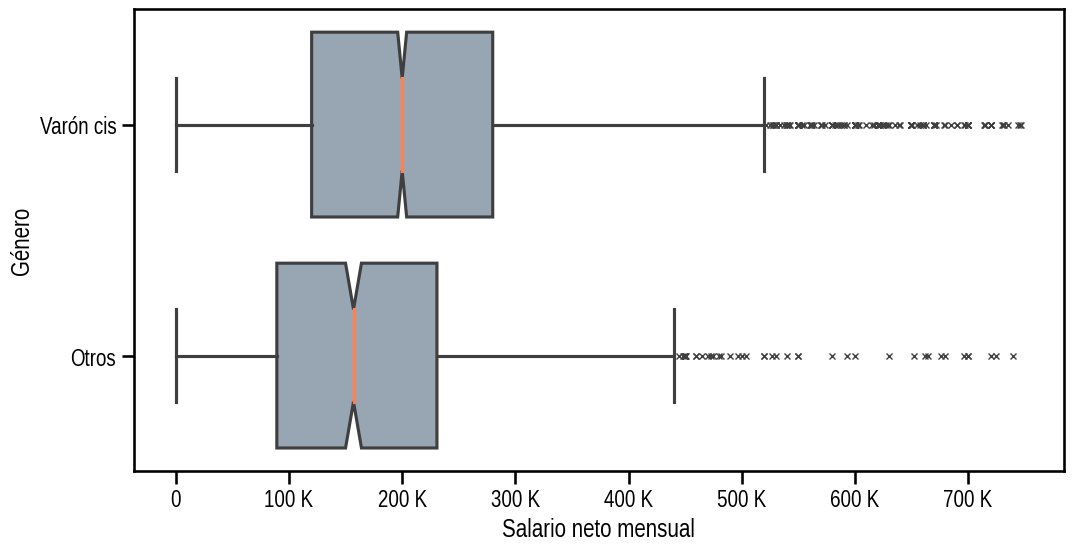

In [93]:
from matplotlib.ticker import FuncFormatter

df.loc[:,'Género'] = df.profile_g.replace({'Mujer cis': 'Otros','Diversidades': 'Otros'}).fillna(False)

plt.figure(figsize=(12, 6))
plot = seaborn.boxplot(data=df[df['salary_monthly_NETO']<750000], x='salary_monthly_NETO', y='Género',notch=True,medianprops={"color": "coral"},
                showcaps=True, flierprops={"marker": "x"},boxprops={"facecolor": (.2, .3, .4, .5)})
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Salario neto mensual')
matplotlib.rcParams['font.sans-serif'] = "Liberation Sans Narrow"
def currency_formatter(x, _):
    if x == 0:
        return 0
    elif x == 1000000:
        return '1 M'
    else:
        return f"{int(x/1000)} K"
plot.xaxis.set_major_formatter(FuncFormatter(currency_formatter))

In [88]:
# Datos de salario promedio y mediano

df[(df.salary_monthly_NETO > 1000) & (is_man) & (df.salary_monthly_NETO < 1000000)]['salary_monthly_NETO'].describe()
# 250.507
df[(df.salary_monthly_NETO > 1000) & (~is_man) & (df.salary_monthly_NETO < 1000000)]['salary_monthly_NETO'].describe()
# 204.687 

count       874.000000
mean     204687.136110
std      138804.093353
min        1400.000000
25%      115700.000000
50%      180000.000000
75%      247408.250000
max      985887.000000
Name: salary_monthly_NETO, dtype: float64